In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("E:\Python\ML_PROJECTS\MNC_Transportation_Data_Analysis\MNC_Transportation_Dataset.csv")

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [12]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [15]:
#check for duplicate entry
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [17]:
df.drop_duplicates(inplace=True)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE


In [19]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [21]:
#purpose has lot of missing values lets fill that with label "missing"
df['PURPOSE']=df['PURPOSE'].fillna("missing")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,missing
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [23]:
df.dropna(inplace=True)
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Feature Engineering

In [24]:
df['START_DATE']=pd.to_datetime(df['START_DATE'])
df['END_DATE']=pd.to_datetime(df['END_DATE'])

In [26]:
#creating new features for analysis

df['DAY']=df['START_DATE'].dt.day_name()

time_periods=[0,6,12,18,24]
labels=['Night', 'Morning', 'Afternoon', 'Evening']

df['TIME_LABEL']=pd.cut(df['START_DATE'].dt.hour,bins=time_periods,labels=labels,right=False)
df['MONTH']=df['START_DATE'].dt.month_name()
df['DURATION']=(df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')

In [27]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,TIME_LABEL,MONTH,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,missing,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Afternoon,January,67.0
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday,Night,December,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday,Afternoon,December,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday,Afternoon,December,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday,Evening,December,18.0


# Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

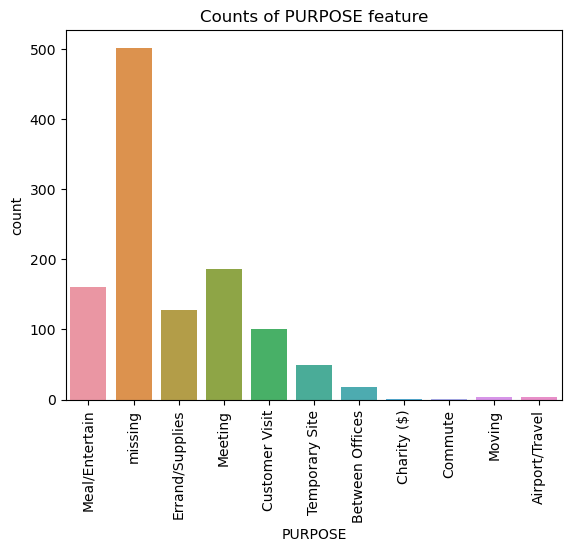

In [35]:

sns.countplot(df['PURPOSE'])
plt.title('Counts of PURPOSE feature')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

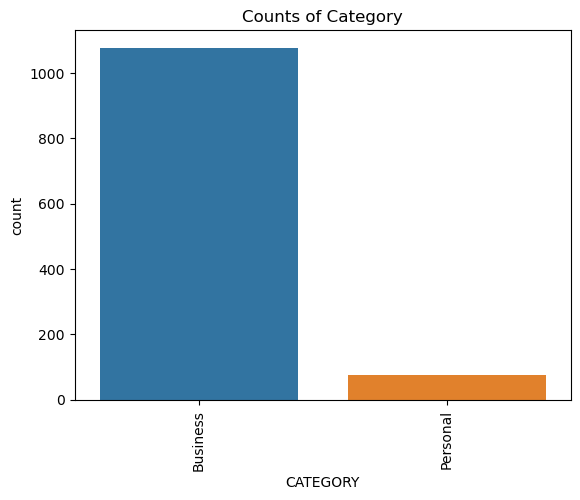

In [36]:
sns.countplot('CATEGORY',data=df)
plt.title("Counts of Category")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

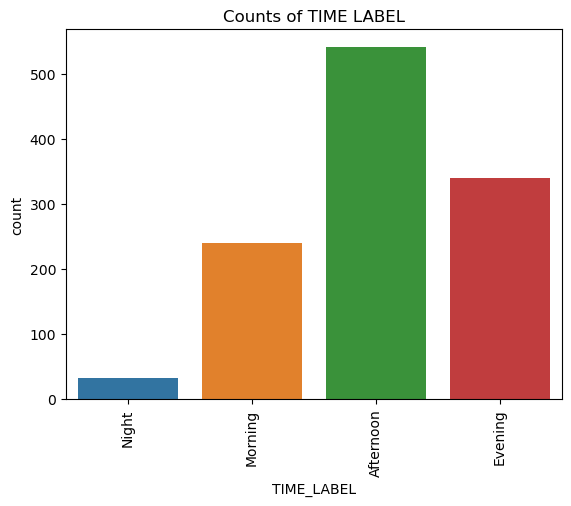

In [39]:
sns.countplot('TIME_LABEL',data=df)
plt.title("Counts of TIME LABEL")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

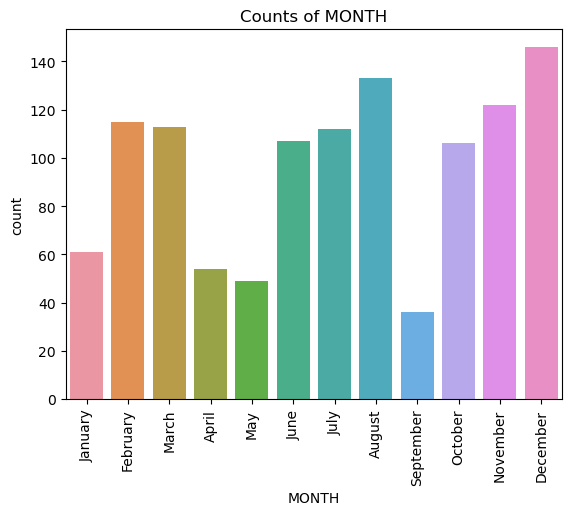

In [40]:
sns.countplot('MONTH',data=df)
plt.title("Counts of MONTH")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'missing'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

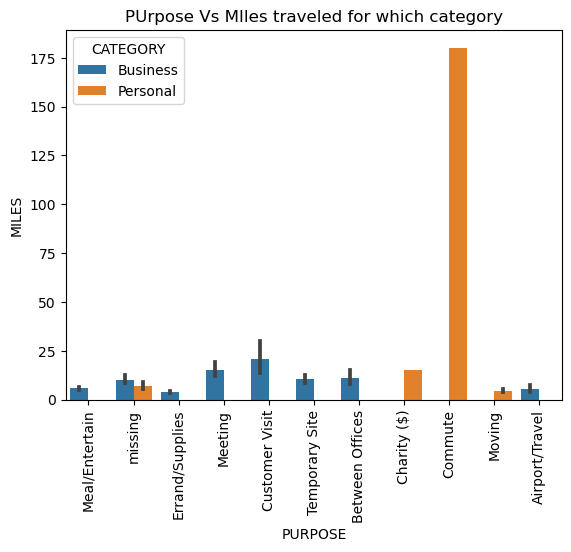

In [47]:
sns.barplot('PURPOSE','MILES',data=df,hue='CATEGORY')
plt.title("PUrpose Vs MIles traveled for which category")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='TIME_LABEL', ylabel='MILES'>

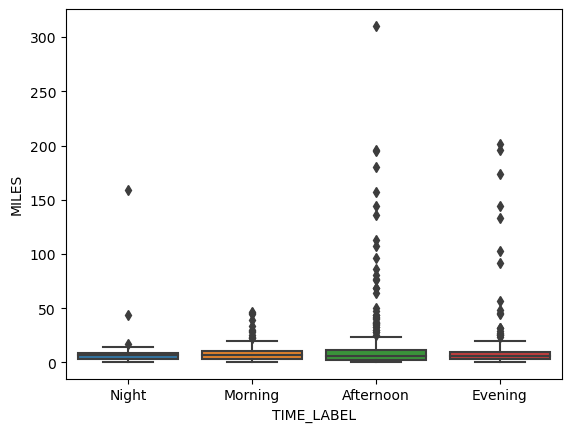

In [51]:
sns.boxplot('TIME_LABEL','MILES',data=df)

Text(0.5, 1.0, 'Outliers in Duration')

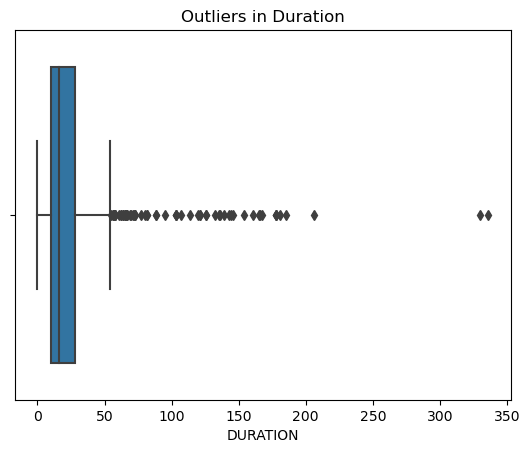

In [54]:
sns.boxplot("DURATION",data=df)
plt.title("Outliers in Duration")

<AxesSubplot:xlabel='MILES'>

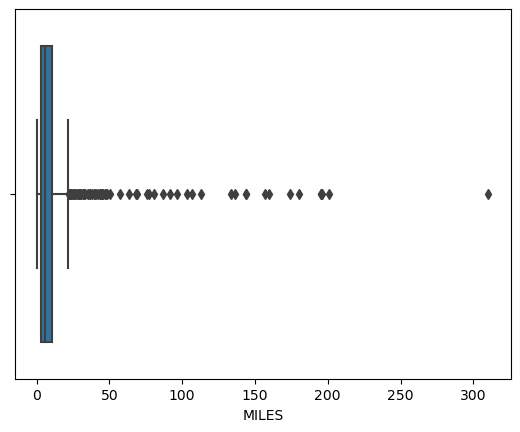

In [55]:
sns.boxplot('MILES',data=df)

Text(0.5, 1.0, 'MILES distribution')

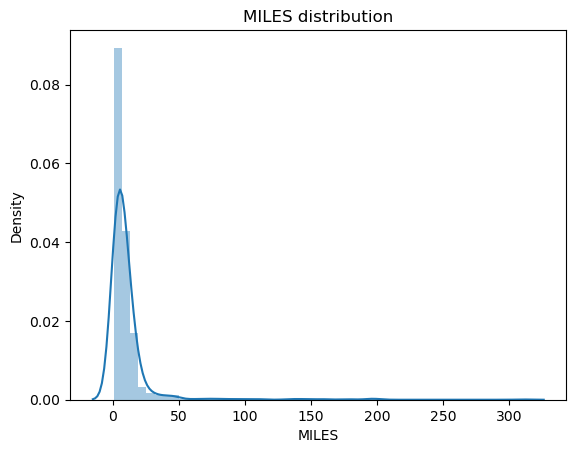

In [60]:
sns.distplot(df['MILES'])
plt.title('MILES distribution')

Text(0.5, 1.0, 'DURATION distribution')

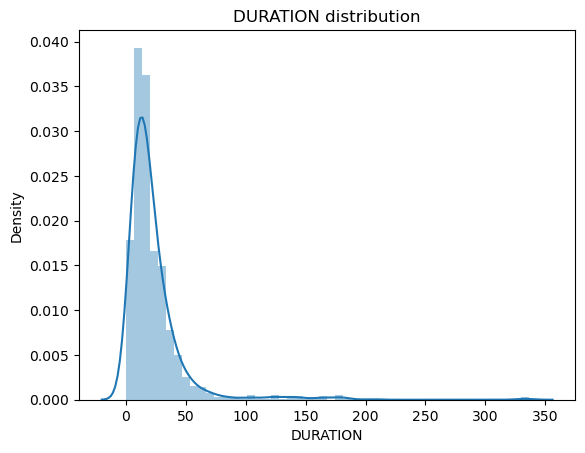

In [63]:
sns.distplot(df['DURATION'])
plt.title('DURATION distribution')

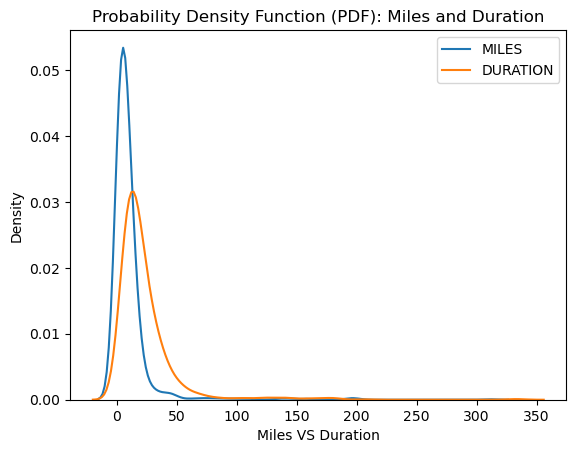

In [73]:
sns.distplot(df['MILES'],hist=False,label='MILES')
sns.distplot(df['DURATION'],hist=False,label='DURATION')
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()

In [76]:
df['DAY'].value_counts()

Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: DAY, dtype: int64

In [79]:
df.set_index('START_DATE', inplace=True)
daily_miles = df.resample('D')['MILES'].sum()

In [80]:
daily_miles

START_DATE
2016-01-01     5.1
2016-01-02     9.8
2016-01-03     0.0
2016-01-04     0.0
2016-01-05     4.7
              ... 
2016-12-27    27.0
2016-12-28    44.5
2016-12-29    74.9
2016-12-30    15.7
2016-12-31    75.4
Freq: D, Name: MILES, Length: 366, dtype: float64

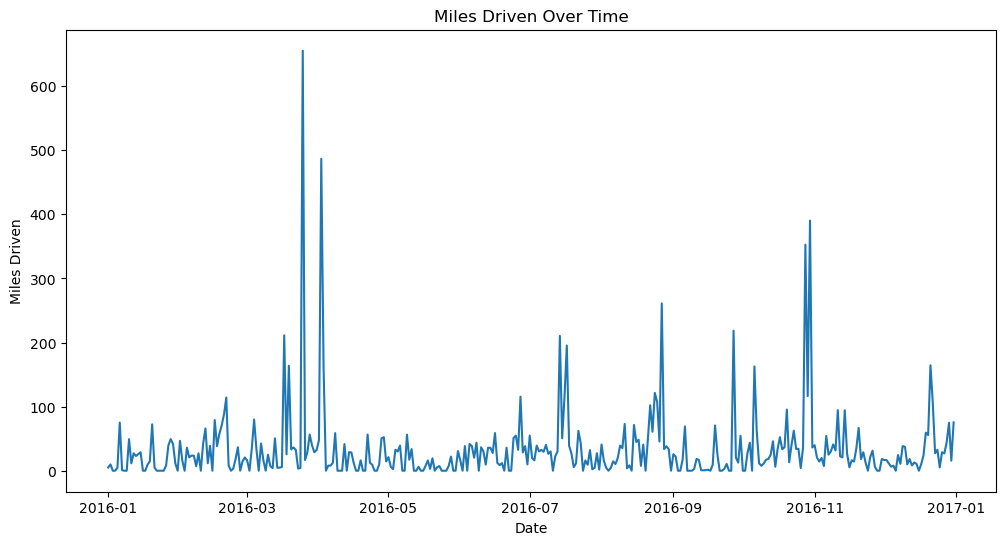

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

# Outliers removal

In [90]:
Q1_miles=np.percentile(df['MILES'],25)
Q3_miles=np.percentile(df['MILES'],75)
IQR_Miles=Q3_miles-Q1_miles
Lower_fence_miles=Q1_miles-(1.5*IQR_Miles)
Higher_fence_miles=Q3_miles+(1.5*IQR_Miles)
print('Miles lower fence = ', Lower_fence_miles,' Higher fence = ', Higher_fence_miles)

Miles lower fence =  -8.35  Higher fence =  21.65


In [91]:
df=df.drop(df[(df['MILES'] > Higher_fence_miles) | (df['MILES'] < Lower_fence_miles) ].index)

In [94]:
Q1_duration=np.percentile(df['DURATION'],25)
Q3_duration=np.percentile(df['DURATION'],75)
IQR_duration=Q3_duration-Q1_duration
Lower_fence_duration=Q1_duration-(1.5*IQR_duration)
Higher_fence_duration=Q3_duration+(1.5*IQR_duration)
print('DURATION lower fence = ', Lower_fence_duration,' Higher fence = ', Higher_fence_duration)

DURATION lower fence =  -11.0  Higher fence =  45.0


In [95]:
df=df.drop(df[(df['DURATION'] > Higher_fence_duration) | (df['DURATION'] < Lower_fence_duration) ].index)

In [96]:
df

,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,TIME_LABEL,MONTH,DURATION
START_DATE,,,,,,,,,,
2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,missing,Saturday,Night,January,12.0
2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Afternoon,January,4.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,Friday,Evening,December,4.0
2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Saturday,Night,December,7.0
2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Saturday,Afternoon,December,18.0


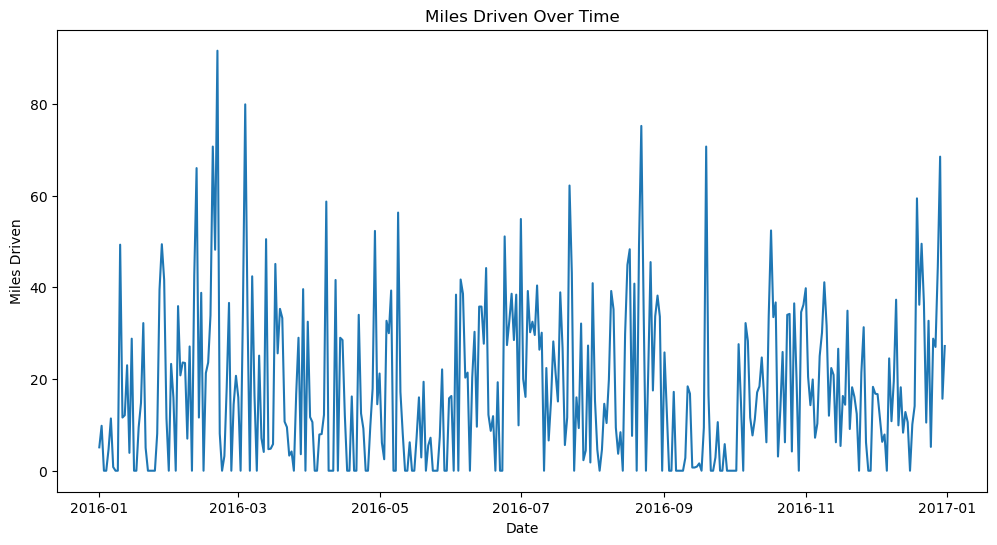

In [99]:
daily_miles = df.resample('D')['MILES'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

# Encoding Categorical Variables

In [104]:
df=df.reset_index()

In [106]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DAY,TIME_LABEL,MONTH,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Evening,January,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,missing,Saturday,Night,January,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Evening,January,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Afternoon,January,14.0
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Wednesday,Afternoon,January,4.0


In [107]:
df_encoded=pd.get_dummies(data=df,columns=['CATEGORY','START','STOP','PURPOSE','DAY','TIME_LABEL','MONTH'])

In [119]:
df_encoded

,START_DATE,END_DATE,MILES,DURATION,CATEGORY_Business,CATEGORY_Personal,START_Agnew,START_Almond,START_Apex,START_Arabi,...,MONTH_December,MONTH_February,MONTH_January,MONTH_July,MONTH_June,MONTH_March,MONTH_May,MONTH_November,MONTH_October,MONTH_September
0,2016-01-01 21:11:00,2016-01-01 21:17:00,5.1,6.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,5.0,12.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,4.8,13.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,4.7,14.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2016-01-06 17:15:00,2016-01-06 17:19:00,4.3,4.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2016-12-30 23:06:00,2016-12-30 23:10:00,0.8,4.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1034,2016-12-31 01:07:00,2016-12-31 01:14:00,0.7,7.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1035,2016-12-31 13:24:00,2016-12-31 13:42:00,3.9,18.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1036,2016-12-31 15:03:00,2016-12-31 15:38:00,16.2,35.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Train_Test_Split

In [120]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop(['START_DATE','END_DATE','MILES'],axis=1)
y=df_encoded['MILES']

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor

In this section, we will train and evaluate various models for our dataset. Let's explore different machine learning algorithms to find the best model for our task.

In [126]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor()
}

In [128]:
accuracy={}
predictions={}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    predictions[name] = y_pred

Learning rate set to 0.039755
0:	learn: 4.3891075	total: 74.8ms	remaining: 1m 14s
1:	learn: 4.3007251	total: 78.8ms	remaining: 39.3s
2:	learn: 4.2199008	total: 82.6ms	remaining: 27.5s
3:	learn: 4.1472539	total: 87ms	remaining: 21.7s
4:	learn: 4.0693166	total: 91.2ms	remaining: 18.2s
5:	learn: 3.9999676	total: 95.2ms	remaining: 15.8s
6:	learn: 3.9383530	total: 99.3ms	remaining: 14.1s
7:	learn: 3.8869126	total: 101ms	remaining: 12.5s
8:	learn: 3.8240446	total: 105ms	remaining: 11.6s
9:	learn: 3.7671410	total: 109ms	remaining: 10.8s
10:	learn: 3.7122606	total: 113ms	remaining: 10.2s
11:	learn: 3.6564747	total: 118ms	remaining: 9.69s
12:	learn: 3.6050978	total: 122ms	remaining: 9.24s
13:	learn: 3.5590369	total: 126ms	remaining: 8.85s
14:	learn: 3.5137368	total: 129ms	remaining: 8.5s
15:	learn: 3.4701547	total: 134ms	remaining: 8.23s
16:	learn: 3.4329968	total: 138ms	remaining: 7.96s
17:	learn: 3.3981274	total: 140ms	remaining: 7.64s
18:	learn: 3.3609791	total: 144ms	remaining: 7.44s
19:	le

174:	learn: 2.2588257	total: 935ms	remaining: 4.41s
175:	learn: 2.2552125	total: 943ms	remaining: 4.41s
176:	learn: 2.2518617	total: 947ms	remaining: 4.4s
177:	learn: 2.2473142	total: 951ms	remaining: 4.39s
178:	learn: 2.2436007	total: 956ms	remaining: 4.38s
179:	learn: 2.2429380	total: 960ms	remaining: 4.37s
180:	learn: 2.2402559	total: 965ms	remaining: 4.37s
181:	learn: 2.2387503	total: 970ms	remaining: 4.36s
182:	learn: 2.2376579	total: 975ms	remaining: 4.35s
183:	learn: 2.2348811	total: 979ms	remaining: 4.34s
184:	learn: 2.2338211	total: 983ms	remaining: 4.33s
185:	learn: 2.2306483	total: 988ms	remaining: 4.32s
186:	learn: 2.2285747	total: 991ms	remaining: 4.31s
187:	learn: 2.2275742	total: 995ms	remaining: 4.3s
188:	learn: 2.2254523	total: 999ms	remaining: 4.29s
189:	learn: 2.2236515	total: 1s	remaining: 4.28s
190:	learn: 2.2196111	total: 1.01s	remaining: 4.27s
191:	learn: 2.2173261	total: 1.01s	remaining: 4.25s
192:	learn: 2.2161535	total: 1.01s	remaining: 4.24s
193:	learn: 2.213

334:	learn: 1.9569776	total: 2.12s	remaining: 4.2s
335:	learn: 1.9563366	total: 2.13s	remaining: 4.21s
336:	learn: 1.9557106	total: 2.14s	remaining: 4.22s
337:	learn: 1.9544464	total: 2.15s	remaining: 4.22s
338:	learn: 1.9523380	total: 2.16s	remaining: 4.22s
339:	learn: 1.9516646	total: 2.17s	remaining: 4.21s
340:	learn: 1.9510504	total: 2.18s	remaining: 4.21s
341:	learn: 1.9503962	total: 2.19s	remaining: 4.21s
342:	learn: 1.9458789	total: 2.2s	remaining: 4.21s
343:	learn: 1.9443333	total: 2.2s	remaining: 4.2s
344:	learn: 1.9436742	total: 2.21s	remaining: 4.2s
345:	learn: 1.9430159	total: 2.22s	remaining: 4.2s
346:	learn: 1.9423639	total: 2.23s	remaining: 4.2s
347:	learn: 1.9417183	total: 2.23s	remaining: 4.19s
348:	learn: 1.9404557	total: 2.24s	remaining: 4.19s
349:	learn: 1.9398437	total: 2.25s	remaining: 4.18s
350:	learn: 1.9392085	total: 2.26s	remaining: 4.18s
351:	learn: 1.9376858	total: 2.27s	remaining: 4.17s
352:	learn: 1.9364956	total: 2.28s	remaining: 4.18s
353:	learn: 1.93372

515:	learn: 1.7542507	total: 3.71s	remaining: 3.48s
516:	learn: 1.7538174	total: 3.72s	remaining: 3.48s
517:	learn: 1.7533969	total: 3.73s	remaining: 3.47s
518:	learn: 1.7529793	total: 3.75s	remaining: 3.47s
519:	learn: 1.7520759	total: 3.75s	remaining: 3.46s
520:	learn: 1.7516562	total: 3.76s	remaining: 3.46s
521:	learn: 1.7505240	total: 3.78s	remaining: 3.46s
522:	learn: 1.7497500	total: 3.8s	remaining: 3.47s
523:	learn: 1.7486255	total: 3.81s	remaining: 3.46s
524:	learn: 1.7482089	total: 3.82s	remaining: 3.46s
525:	learn: 1.7476369	total: 3.83s	remaining: 3.45s
526:	learn: 1.7472194	total: 3.84s	remaining: 3.44s
527:	learn: 1.7465939	total: 3.85s	remaining: 3.44s
528:	learn: 1.7447295	total: 3.86s	remaining: 3.44s
529:	learn: 1.7443198	total: 3.87s	remaining: 3.43s
530:	learn: 1.7426446	total: 3.87s	remaining: 3.42s
531:	learn: 1.7417431	total: 3.88s	remaining: 3.42s
532:	learn: 1.7413665	total: 3.89s	remaining: 3.41s
533:	learn: 1.7405458	total: 3.9s	remaining: 3.4s
534:	learn: 1.7

675:	learn: 1.6095062	total: 5.69s	remaining: 2.73s
676:	learn: 1.6090332	total: 5.7s	remaining: 2.72s
677:	learn: 1.6065831	total: 5.71s	remaining: 2.71s
678:	learn: 1.6062777	total: 5.73s	remaining: 2.71s
679:	learn: 1.6050916	total: 5.74s	remaining: 2.7s
680:	learn: 1.6044229	total: 5.74s	remaining: 2.69s
681:	learn: 1.6026322	total: 5.75s	remaining: 2.68s
682:	learn: 1.6021475	total: 5.75s	remaining: 2.67s
683:	learn: 1.6018416	total: 5.76s	remaining: 2.66s
684:	learn: 1.6015197	total: 5.76s	remaining: 2.65s
685:	learn: 1.6010707	total: 5.77s	remaining: 2.64s
686:	learn: 1.6007659	total: 5.77s	remaining: 2.63s
687:	learn: 1.6004657	total: 5.78s	remaining: 2.62s
688:	learn: 1.6000328	total: 5.78s	remaining: 2.61s
689:	learn: 1.5972759	total: 5.79s	remaining: 2.6s
690:	learn: 1.5961328	total: 5.79s	remaining: 2.59s
691:	learn: 1.5948607	total: 5.8s	remaining: 2.58s
692:	learn: 1.5945619	total: 5.8s	remaining: 2.57s
693:	learn: 1.5942625	total: 5.81s	remaining: 2.56s
694:	learn: 1.593

841:	learn: 1.4658683	total: 7.3s	remaining: 1.37s
842:	learn: 1.4656354	total: 7.31s	remaining: 1.36s
843:	learn: 1.4647146	total: 7.32s	remaining: 1.35s
844:	learn: 1.4639262	total: 7.33s	remaining: 1.34s
845:	learn: 1.4636971	total: 7.35s	remaining: 1.34s
846:	learn: 1.4626357	total: 7.37s	remaining: 1.33s
847:	learn: 1.4622819	total: 7.38s	remaining: 1.32s
848:	learn: 1.4612513	total: 7.39s	remaining: 1.31s
849:	learn: 1.4610177	total: 7.41s	remaining: 1.31s
850:	learn: 1.4607903	total: 7.42s	remaining: 1.3s
851:	learn: 1.4605539	total: 7.44s	remaining: 1.29s
852:	learn: 1.4603283	total: 7.44s	remaining: 1.28s
853:	learn: 1.4589264	total: 7.45s	remaining: 1.27s
854:	learn: 1.4580151	total: 7.47s	remaining: 1.27s
855:	learn: 1.4577893	total: 7.47s	remaining: 1.26s
856:	learn: 1.4565935	total: 7.48s	remaining: 1.25s
857:	learn: 1.4561456	total: 7.49s	remaining: 1.24s
858:	learn: 1.4559211	total: 7.5s	remaining: 1.23s
859:	learn: 1.4551962	total: 7.51s	remaining: 1.22s
860:	learn: 1.4

# Model Evaluation

Results for Linear Regression:
Mean Squared Error: 9.558423277446711e+21
R-squared Score: -4.6363315262068693e+20


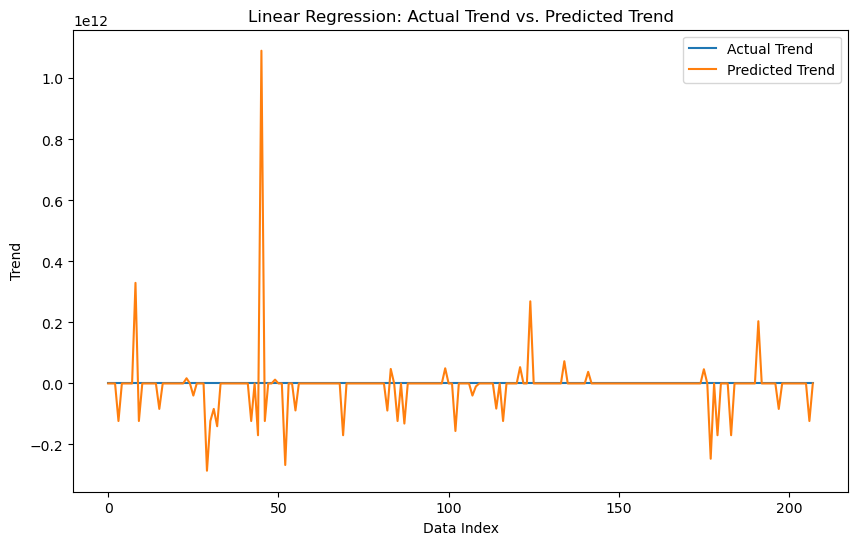


Results for Decision Tree:
Mean Squared Error: 15.880348557692308
R-squared Score: 0.2297206502781065


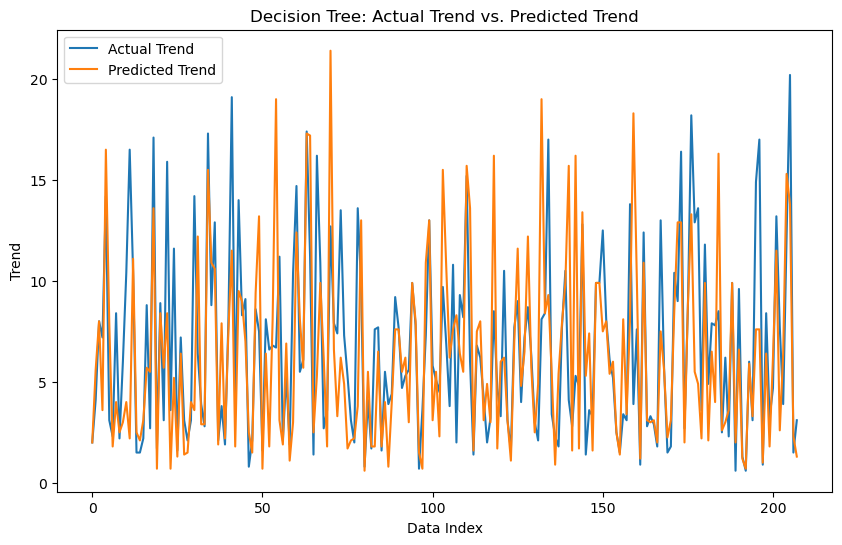


Results for Random Forest:
Mean Squared Error: 9.79019642610637
R-squared Score: 0.5251246463921012


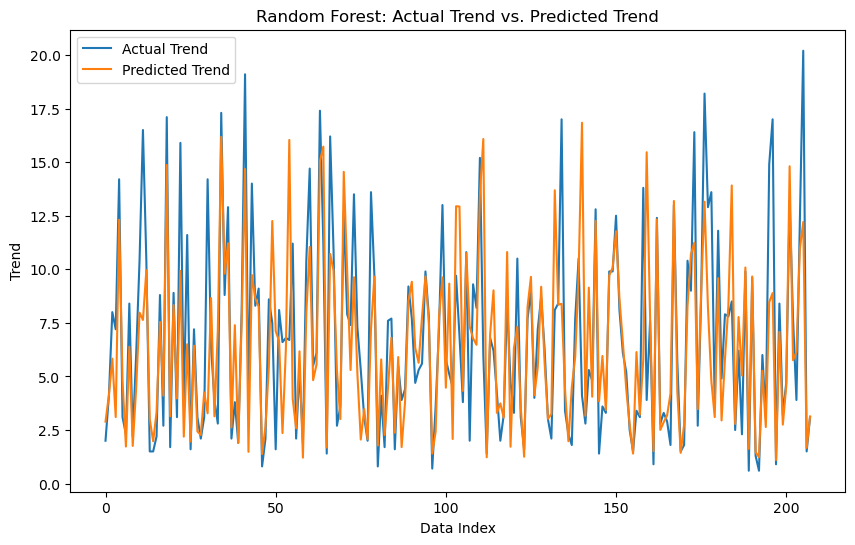


Results for SVR:
Mean Squared Error: 10.100525550279269
R-squared Score: 0.5100720727600271


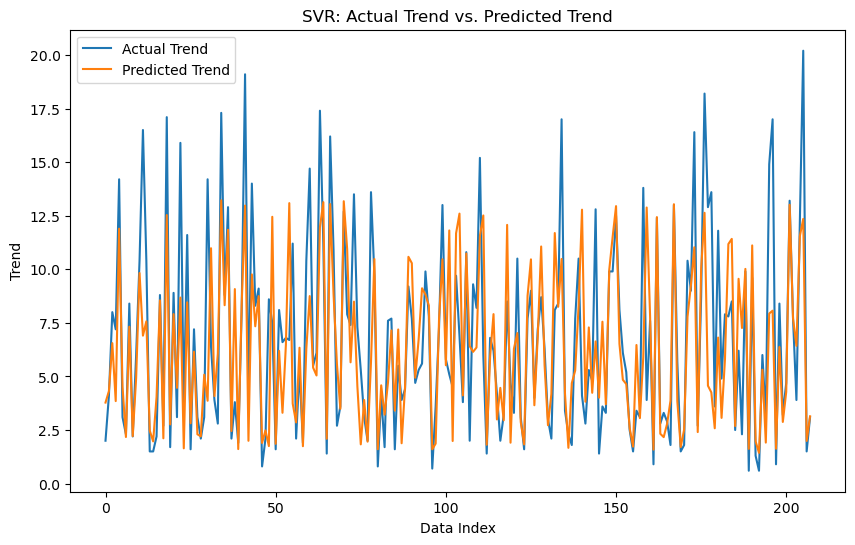


Results for XGBoost:
Mean Squared Error: 10.567085270439321
R-squared Score: 0.487441504133293


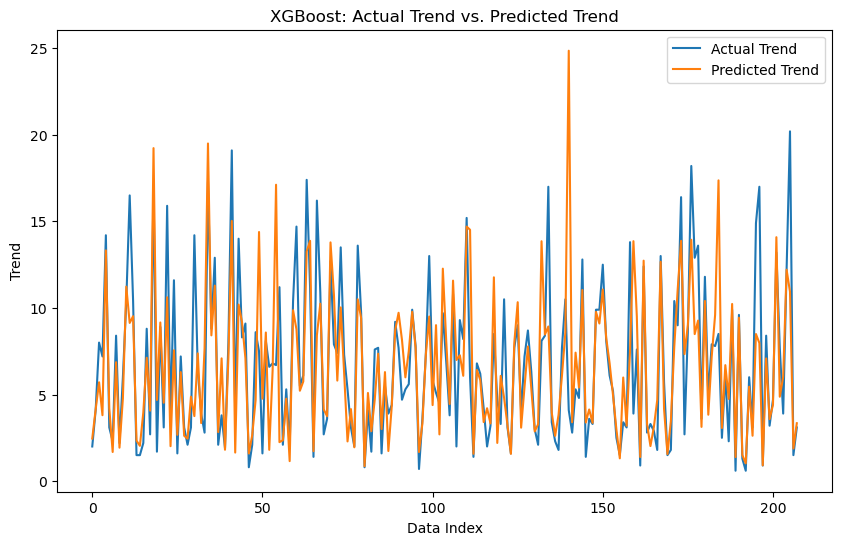


Results for Gradient Boosting Regressor:
Mean Squared Error: 8.648597778603884
R-squared Score: 0.580498107537931


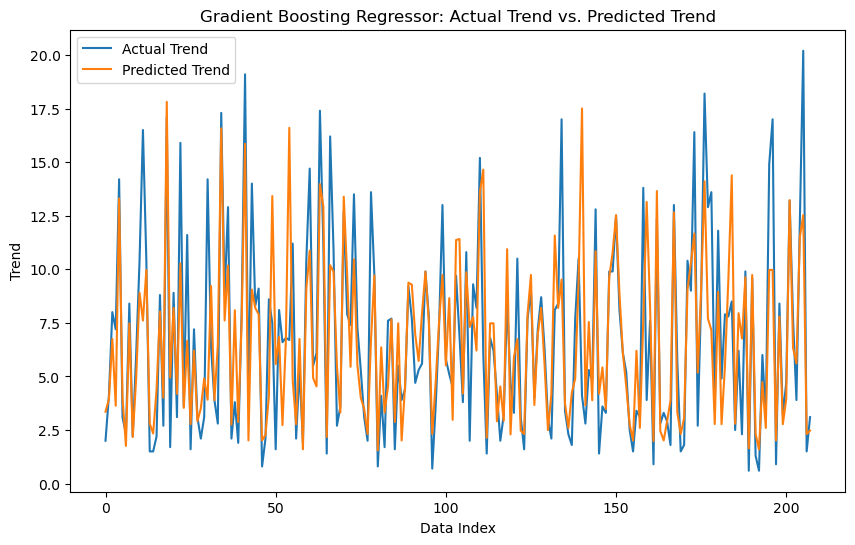


Results for ADA Boost:
Mean Squared Error: 11.89123401738372
R-squared Score: 0.42321341543448865


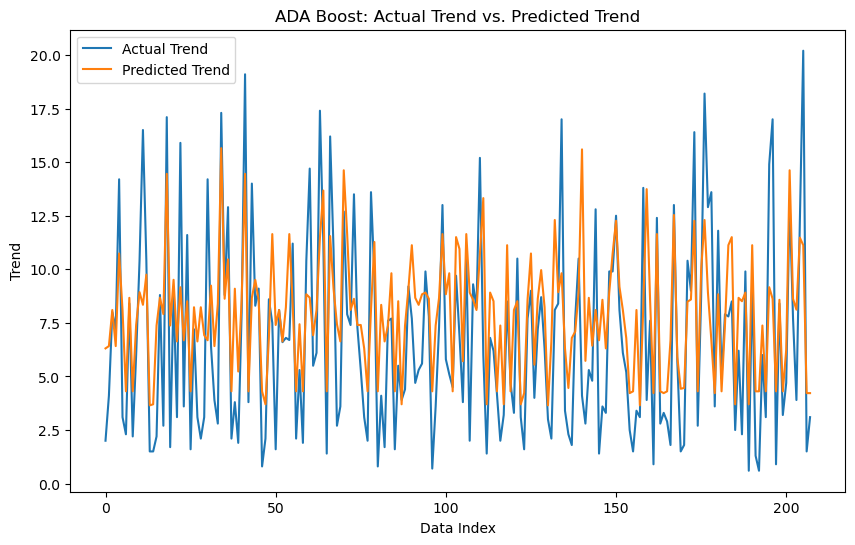


Results for Cat Boost Regressor:
Mean Squared Error: 8.082547005256194
R-squared Score: 0.6079545087636226


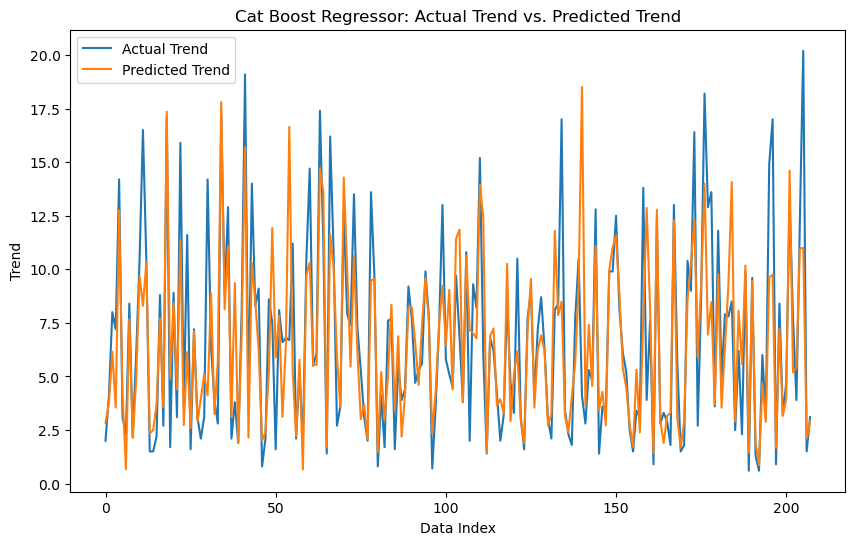

In [132]:
for name,y_pred in predictions.items():
    mse=mean_squared_error(y_test,y_pred)
    r2score=r2_score(y_test,y_pred)
    accuracy[name]=r2score
    
    print(f"Results for {name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2score}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()
    

In [133]:
accuracy_df = pd.DataFrame({'Model': list(accuracy.keys()), 'Accuracy Score': list(accuracy.values())})
accuracy_df

,Model,Accuracy Score
0,Linear Regression,-4.636332e+20
1,Decision Tree,2.297207e-01
2,Random Forest,5.251246e-01
3,SVR,5.100721e-01
4,XGBoost,4.874415e-01
5,Gradient Boosting Regressor,5.804981e-01
6,ADA Boost,4.232134e-01
7,Cat Boost Regressor,6.079545e-01
